## Imports

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy import stats
from scipy.optimize import leastsq
from lmfit import minimize, Parameters, report_fit
%matplotlib inline

In [2]:
k = constants.value('Boltzmann constant in eV/K')
e = np.exp(1)

## Get Data

In [80]:
GRDF = pd.read_csv("../Results/sorted_data.csv")
GRDF.StandardisedTraitValue

## Choose id

In [81]:
GRDF = pd.read_csv("../Results/sorted_data.csv")
id   = 3
GRDF = GRDF[GRDF.NewID == id]

## General cubic polynomial model

$$ \large B = B_0 + B_1T + B_2T^2 + B_3T^3 $$

## Full Schoolfield Model

$$ \large B = \frac{B_0e^{\frac{-E}{k}(\frac{1}{T} - \frac{1}{283.15})}}{1 + e^{\frac{E_l}{k}(\frac{1}{T_l}-\frac{1}{T})} + e^{\frac{E_h}{k}(\frac{1}{T_h}-\frac{1}{T})}} $$

## Enzyme-assisted Arrhenius model

$$ \large V = A_0e\frac{-(E_b-(E_{\Delta H}(1 - \frac{T}{T_m}) + E_{\Delta Cp}(T - T_m - T\ln\frac{T}{T_m})))}{kT} $$

In [ ]:
aparams = Parameters()
aparams.add('A0', value = 1.11, min = 0)
aparams.add('Ea', value = 1, min = 0)
aparams.add('deltaCp', value = 0.001, min = 0)
aparams.add('deltaH', value = 0.01, min = 0)
aparams.add('trefs', value = 300, min = 260, max = 400)

In [103]:
GRDF = pd.read_csv("../Results/sorted_data.csv")
id   = 22
GRDF = GRDF[GRDF.NewID == id]

xVals = GRDF.UsedTempK
ldata = GRDF.STVlogged

[[Fit Statistics]]
    # function evals   = 3690
    # data points      = 6
    # variables        = 5
    chi-square         = 0.868
    reduced chi-square = 0.868
    Akaike info crit   = -1.599
    Bayesian info crit = -2.640
[[Variables]]
    A0:        19.9991033 +/- 0        (0.00%) (init= 6.974028)
    Ea:        0.27449254 +/- 0        (0.00%) (init= 3.240451)
    deltaCp:   1.1102e-15 +/- 0        (0.00%) (init= 4.820091)
    deltaH:    3.9224e-11 +/- 0        (0.00%) (init= 4.048907)
    trefs:     276.208205 +/- 0        (0.00%) (init= 300.6924)


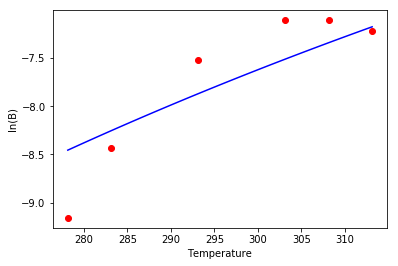

In [104]:
aparams = Parameters()
aparams.add('A0', value = np.random.uniform(0, 10), min = 0, max = 20)
aparams.add('Ea', value = np.random.uniform(0, 10), min = 0, max = 20)
aparams.add('deltaCp', value = np.random.uniform(0, 10), min = 0, max = 20)
aparams.add('deltaH', value = np.random.uniform(0, 10), min = 0, max = 20)
aparams.add('trefs', value = np.random.uniform(280, 350), min = 260, max = 400)

def arrhenius_residual(aparams, x, data):
    
    A0      = aparams['A0'].value
    Ea      = aparams['Ea'].value
    deltaCp = aparams['deltaCp'].value
    deltaH  = aparams['deltaH'].value
    trefs   = aparams['trefs'].value
    
    model = np.log(A0) - ((Ea - deltaH*(1 - x/trefs) - deltaCp*(x - trefs - x*np.log(x/trefs)))/(x*k))
    
    return model - data

out3 = minimize(arrhenius_residual, aparams, args = (xVals, ldata))

A0 = out3.params["A0"].value
Ea = out3.params["Ea"].value
deltaCp = out3.params["deltaCp"].value
deltaH = out3.params["deltaH"].value
trefs = out3.params["trefs"].value

mdlx = np.linspace(min(xVals), max(xVals), num = 100)
mdly = np.log(A0) - ((Ea - deltaH*(1 - mdlx/trefs) - deltaCp*(mdlx - trefs - mdlx*np.log(mdlx/trefs)))/(mdlx*k))

report_fit(out3)

plt.plot(xVals, ldata, 'ro')
plt.plot(mdlx, mdly, 'b')
plt.ylabel("ln(B)")
plt.xlabel("Temperature")
plt.show()

params = out3.params

In [29]:
def arrhenius_model(aparams, x, data):
    
    A0      = aparams['A0'].value
    Ea      = aparams['Ea'].value
    deltaCp = aparams['deltaCp'].value
    deltaH  = aparams['deltaH'].value
    trefs   = aparams['trefs'].value
    
    model = np.log(A0) - ((Ea - deltaH*(1 - x/trefs) - deltaCp*(x - trefs - x*np.log(x/trefs)))/(x*k))
    
    return model - data

In [31]:
a = arrhenius_model(params,xVals, ldata)

In [144]:
import sys
sys.path.insert(0, '../Code/')

from modelfuncs import *
GRDF = pd.read_csv("../Results/sorted_data.csv")


id   = 4
GRDF = GRDF[GRDF.NewID == id]

xVals = GRDF.UsedTemp
ldata = GRDF.StandardisedTraitValue

In [148]:
tmp = cubic_model(4, GRDF)

a = tmp.a[0]
b = tmp.b[0]
c = tmp.c[0]
d = tmp.d[0]

4 Cubic aic: -330.083100631


In [146]:
mdlx = np.linspace(min(xVals), max(xVals), num = 100)
mdly = a + b*mdlx + c*mdlx**2 + d*mdlx**3

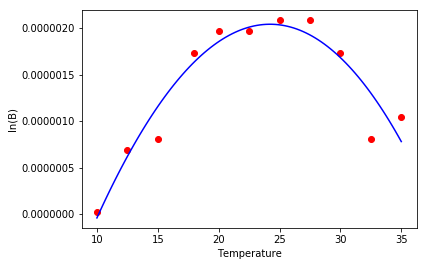

In [147]:
plt.plot(xVals, ldata, 'ro')
plt.plot(mdlx, mdly, 'b')
plt.ylabel("ln(B)")
plt.xlabel("Temperature")
plt.show()

In [168]:
lxVals = GRDF.UsedTempK
ldata = GRDF.STVlogged

lmdlx = np.linspace(min(xVals), max(xVals), num = 100)
lmdly = np.log(a + b*lmdlx + c*lmdlx**2 + d*lmdlx**3)

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


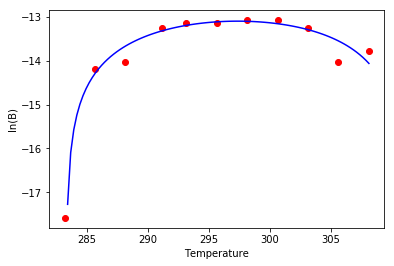

In [173]:
plt.plot(lxVals, ldata, 'ro')
plt.plot(lmdlx+273.15, lmdly, 'b')
plt.ylabel("ln(B)")
plt.xlabel("Temperature")
plt.show()

In [ ]:
xVals
